# Mars Entry-Descent-Landing Mission Scenario (2nd encoding attempt)

This case study demonstrates using Pacti for formalizing a simplified version of a Mars Entry-Descent-Landing mission scenario based on the following paper: [R. Prakash et al. 2008](#ref1)
and the Mars 2020 EDL timeline from https://mars.nasa.gov/mars2020/timeline/landing/entry-descent-landing/

![](https://mars.nasa.gov/internal_resources/961/)

For this case study, we have segmented the overall Mars 2020 EDL timeline into 4 segments -- S1, S2, S3, and S4 -- as shown below:

![](figures/m2020-edl-timeline-segmented.png)

EDL engineers at JPL characterize these segments in terms of entry and exit conditions, some of which are included in the diagram above, others in the narrative explanations at https://mars.nasa.gov/mars2020/timeline/landing/entry-descent-landing/.

In [1]:
# The following Python imports provide access to the Pacti API 
# and to the plotting libraries for visualizing algebraic contracts.

%matplotlib widget

from pacti.iocontract import *
from pacti.terms.polyhedra import *
import matplotlib.pyplot as plt

from edl import *

# Segment S1: parachute Entry

For explanations, see: https://mars.nasa.gov/resources/25445/perseverance-rover-decelerating-in-the-martian-atmosphere-illustration/

![](https://mars.nasa.gov/system/resources/detail_files/25445_04_PeakHeating-1200.jpg)

For the contract below, it would be tempting to add an output variable, `t1`, with a guarantee: `t1 = t0 + dt0`. 

In [27]:

# EDL begins when the spacecraft reaches the top of the Martian atmosphere, travelling nearly 20,000 kilometers per hour (kph).
print(f"atmospheric_v_entry = {atmospheric_v_entry}")

# The heat shield slows the spacecraft to under 1,600 kph.
# This point marks be the exit of the atmospheric entry segment
# and the entry of the parachute deployment segment.
print(f"atmospheric_v_exit = {atmospheric_v_exit}")

print(f"atmospheric_t_entry = {atmospheric_t_entry}")
print(f"atmospheric_t_exit = {atmospheric_t_exit}")

atmospheric_t_duration = atmospheric_t_exit - atmospheric_t_entry
atmospheric_t_duration_min = atmospheric_t_duration*0.96
atmospheric_t_duration_max = atmospheric_t_duration*1.03

atmospheric_deacceleration = abs((atmospheric_v_entry - atmospheric_v_exit) / (atmospheric_t_entry - atmospheric_t_exit))
print(f"atmospheric_deacceleration={atmospheric_deacceleration}")

atmospheric_min_deacceleration = atmospheric_deacceleration*0.94
print(f"atmospheric_min_deacceleration={atmospheric_min_deacceleration}")

atmospheric_max_deacceleration = atmospheric_deacceleration*1.03
print(f"atmospheric_max_deacceleration={atmospheric_max_deacceleration}")

S1 = PolyhedralContract.from_string(
    InputVars=[
      "dt0",          # time duration for the atmospheric segment from entry to exit.
      "v0"            # velocity @ entry
    ],
    OutputVars=[
      "v1"            # velocity @ exit
    ],
    assumptions=[
      # velocity @ entry
      f"v0 = {atmospheric_v_entry}"
    ],
    guarantees=[
      # validity bounds on minimum exit velocity
      # 1000 <= v1
      "-v1 <= -1000",
      
      # atmospheric_min_deacceleration * dt0 <= v0 - v1 <= atmospheric_max_deacceleration * dt0
      # v0 - v1 <= atmospheric_max_deacceleration * dt0
      f" v0 - v1 - {atmospheric_max_deacceleration} dt0 <= 0",

      # atmospheric_min_deacceleration * dt0 <= v0 - v1
      f"-v0 + v1 + {atmospheric_min_deacceleration} dt0 <= 0"
    ])

print(S1)

atmospheric_v_entry = 20000.0
atmospheric_v_exit = 1600.0
atmospheric_t_entry = 0.0
atmospheric_t_exit = 90.0
atmospheric_deacceleration=204.44444444444446
atmospheric_min_deacceleration=192.17777777777778
atmospheric_max_deacceleration=210.57777777777778
InVars: [dt0, v0]
OutVars:[v1]
A: [
  v0 = 20000.0
]
G: [
  -v1 <= -1000.0
  -210.57777777777778 dt0 + v0 - v1 <= 0.0
  192.17777777777778 dt0 - v0 + v1 <= 0.0
]


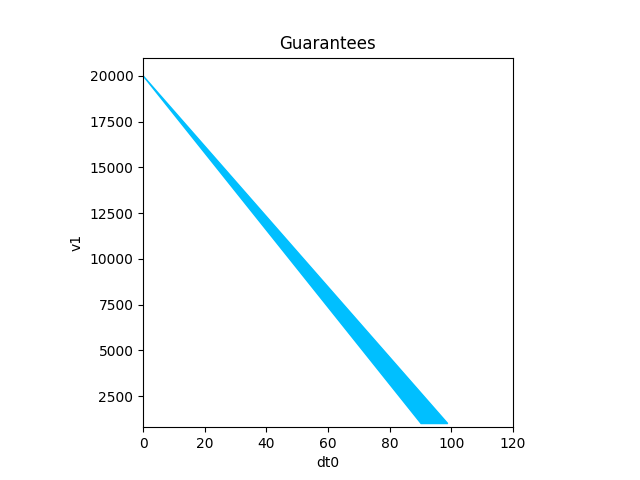

In [29]:
_ = plot_guarantees(
    contract=S1,
    x_var=Var("dt0"),
    y_var=Var("v1"),
    var_values={
        Var("t0"):atmospheric_t_entry,
        Var("v0"):atmospheric_v_entry
    },
    x_lims=(0, 120),
    y_lims=(800, 21000)
)


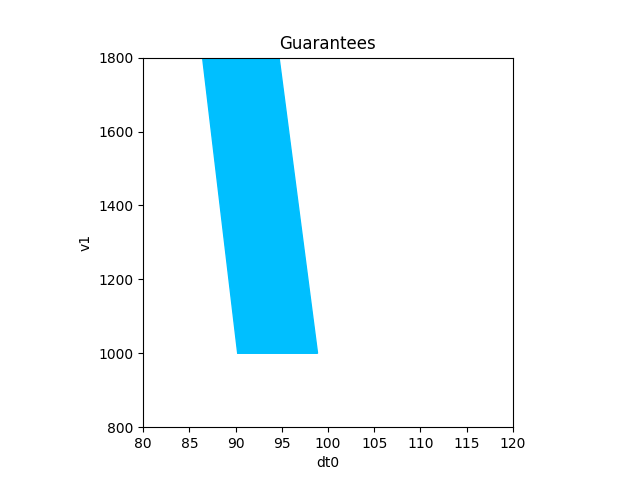

In [30]:
_ = plot_guarantees(
    contract=S1,
    x_var=Var("dt0"),
    y_var=Var("v1"),
    var_values={
        Var("v0"):atmospheric_v_entry
    },
    x_lims=(80, 120),
    y_lims=(800, 1800)
)

# Segment S2: Parachute Deployment

In [31]:
# The parachute can be safely deployed when the velocity is less than 1,600 kph.
parachute_v_entry = 1600.0

# The parachute maximum deceleration capability is 320 kph.
parachute_v_exit = 320.0

parachute_t_entry = 90.0
parachute_t_exit = 350.0
parachute_t_duration = parachute_t_exit - parachute_t_entry
parachute_t_duration_min = parachute_t_duration*0.96
parachute_t_duration_max = parachute_t_duration*1.03

parachute_deacceleration = abs((parachute_v_entry - parachute_v_exit) / (parachute_t_entry - parachute_t_exit))
print(f"parachute_deacceleration={parachute_deacceleration}")

parachute_min_deacceleration = parachute_deacceleration*0.94
print(f"parachute_min_deacceleration={parachute_min_deacceleration}")

parachute_max_deacceleration = parachute_deacceleration*1.03
print(f"parachute_max_deacceleration={parachute_max_deacceleration}")


S2 = PolyhedralContract.from_string(
    InputVars=[
      "dt1",          # time duration for the parachute deployment segment from entry to exit.
      "v1"            # entry velocity
    ],
    OutputVars=[
      "v2"            # exit velocity
    ],
    assumptions=[
      # velocity @ entry
      f"v1 <= {parachute_v_entry}"
    ],
    guarantees=[
      # # parachute effectiveness is limited to v2 >= 320
      f"-v2 <= -{parachute_v_exit}",
      
      # parachute_min_deacceleration * dt1 <= v1 - v2 <= parachute_max_deacceleration * dt1
      # v1 - v2 <= parachute_max_deacceleration * dt1
      f" v1 - v2 - {parachute_max_deacceleration} dt1 <= 0",

      # parachutec_min_deacceleration * dt1 <= v1 - v2
      f"-v1 + v2 + {parachute_min_deacceleration} dt1 <= 0"
   ])

print(S2)

parachute_deacceleration=4.923076923076923
parachute_min_deacceleration=4.627692307692308
parachute_max_deacceleration=5.070769230769232
InVars: [dt1, v1]
OutVars:[v2]
A: [
  v1 <= 1600.0
]
G: [
  -v2 <= -320.0
  -5.070769230769232 dt1 + v1 - v2 <= 0.0
  4.627692307692308 dt1 - v1 + v2 <= 0.0
]


In [6]:
# _ = plot_guarantees(
#     contract=S2,
#     x_var=Var("dt1"),
#     y_var=Var("v2"),
#     var_values={
#         Var("v1"):parachute_v_entry
#     },
#     x_lims=(0, 300),
#     y_lims=(250, 1800)
# )

In [7]:
# _ = plot_guarantees(
#     contract=S2,
#     x_var=Var("dt1"),
#     y_var=Var("v2"),
#     var_values={
#         Var("v1"):parachute_v_entry
#     },
#     x_lims=(200, 300),
#     y_lims=(250, 400)
# )

# Compose S1 and S2


In [8]:
S12 = S1.compose(S2)

print(S12)

InVars: [t0, dt0, v0, dt1]
OutVars:[t2, v2]
A: [
  -192.177777777778 dt0 + v0 <= 1600.0
  t0 = 0.0
  v0 = 20000.0
]
G: [
  -dt0 - dt1 - t0 + t2 = 0.0
  -5.07076923076923 dt1 - v2 <= -1000.0
  -v2 <= -320.0
  192.177777777778 dt0 + 4.627692307692308 dt1 - v0 + v2 <= 0.0
]


Plotting the guarantees for the nominal entry conditions (i.e., `t0=atmospheric_t_entry, v0=atmospheric_v_entry`) requires using a value of `dt0` that is compatible with the constraints. In the example below, we use `dt0=98`.

In [9]:
# _ = plot_guarantees(
#     contract=S12,
#     x_var=Var("dt1"),
#     y_var=Var("v2"),
#     var_values={
#         Var("t0"):atmospheric_t_entry,
#         Var("v0"):atmospheric_v_entry,
#         Var("dt0"):98
#     },
#     x_lims=(60, 180),
#     y_lims=(200, 1000)
# )

# Segment S3: Powered Descent

![](https://mars.nasa.gov/system/resources/detail_files/25449_08_PoweredDescent-1200.jpg)

In [10]:
powered_descent_v_entry = 600.0
powered_descent_v_exit = 2.7

powered_descent_t_entry = 350.0
powered_descent_t_exit = 398.0
powered_descent_t_duration =powered_descent_t_exit - powered_descent_t_entry
powered_descent_t_duration_min = powered_descent_t_duration*0.96
powered_descent_t_duration_max = powered_descent_t_duration*1.03

powered_descent_deacceleration = abs((powered_descent_v_entry - powered_descent_v_exit) / (powered_descent_t_entry - powered_descent_t_exit))
print(f"powered_descent_deacceleration={powered_descent_deacceleration}")

powered_descent_min_deacceleration = powered_descent_deacceleration*0.94
print(f"powered_descent_min_deacceleration={powered_descent_min_deacceleration}")

powered_descent_max_deacceleration = powered_descent_deacceleration*1.03
print(f"powered_descent_max_deacceleration={powered_descent_max_deacceleration}")

S3 = PolyhedralContract.from_string(
    InputVars=[
      "t2",
      "dt2",          # time duration for the powered descent from entry to exit.
      "v2"            # entry velocity
    ],
    OutputVars=[
      "t3",
      "v3"            # exit velocity
    ],
    assumptions=[
      # velocity @ entry
      f"v2 <= {powered_descent_v_entry}",
    ],
    guarantees=[
      "t3 - t2 - dt2 = 0",
      
      # velocity @ exit
      "-v3 <= 0",
      
      # powered_descent_min_deacceleration * dt2 <= v2 - v3 <= powered_descent_max_deacceleration * dt1
      # v2 - v3 <= powered_descent_max_deacceleration * dt2
      f" v2 - v3 - {powered_descent_max_deacceleration} dt2 <= 0",

      # powered_descent_min_deacceleration * dt2 <= v2 - v3
      f"-v2 + v3 + {powered_descent_min_deacceleration} dt2 <= 0"
    ])

print(S3)



powered_descent_deacceleration=12.44375
powered_descent_min_deacceleration=11.697125
powered_descent_max_deacceleration=12.8170625
InVars: [t2, dt2, v2]
OutVars:[t3, v3]
A: [
  v2 <= 600.0
]
G: [
  -dt2 - t2 + t3 = 0.0
  -v3 <= 0.0
  -12.8170625 dt2 + v2 - v3 <= 0.0
  11.697125 dt2 - v2 + v3 <= 0.0
]


In [11]:
# _ = plot_guarantees(
#     contract=S3,
#     x_var=Var("dt2"),
#     y_var=Var("v3"),
#     var_values={
#         Var("v2"):powered_descent_v_entry
#     },
#     x_lims=(20, 60),
#     y_lims=(0, 400)
# )

# Compose S1 and S2 and S3

In [12]:
S123 = S12.compose(S3)
print(S123)

InVars: [t0, dt0, v0, dt1, dt2]
OutVars:[t3, v3]
A: [
  -192.177777777778 dt0 - 4.62769230769231 dt1 + v0 <= 600.0
  -192.177777777778 dt0 + v0 <= 1600.0
  t0 = 0.0
  v0 = 20000.0
]
G: [
  -dt0 - dt1 - dt2 - t0 + t3 = 0.0
  -5.07076923076923 dt1 - 12.8170625 dt2 - v3 <= -1000.0
  -12.8170625 dt2 - v3 <= -320.0
  -v3 <= 0.0
  192.177777777778 dt0 + 4.62769230769231 dt1 + 11.697125 dt2 - v0 + v3 <= 0.0
]


In [13]:
# _ = plot_guarantees(
#     contract=S123,
#     x_var=Var("dt2"),
#     y_var=Var("v3"),
#     var_values={
#         Var("t0"):atmospheric_t_entry,
#         Var("v0"):atmospheric_v_entry,
#         Var("dt0"):98,
#         Var("dt1"):130,
#     },
#     x_lims=(40, 60),
#     y_lims=(0, 10)
# )

# Segment S4: Sky Crane

![](https://mars.nasa.gov/system/resources/detail_files/3650_PIA14839-full2.jpg)

In [14]:
# The sky crane maneuver initiates at a velocity less than 2.7 kph.
print(f"skycrane_v_entry = {skycrane_v_entry}")

# The sky crane maneuver ends when the rover velocity reaches 0 kph.
print(f"skycrane_v_exit = {skycrane_v_exit}")

print(f"skycrane_t_entry = {skycrane_t_entry}")
print(f"skycrane_t_exit = {skycrane_t_exit}")

skycrane_t_duration = skycrane_t_exit - skycrane_t_entry
skycrane_t_duration_min = skycrane_t_duration*0.96
skycrane_t_duration_max = skycrane_t_duration*1.03

skycrane_deacceleration = abs((skycrane_v_entry - skycrane_v_exit) / (skycrane_t_entry - skycrane_t_exit))
print(f"skycrane_deacceleration={skycrane_deacceleration}")

skycrane_min_deacceleration = skycrane_deacceleration*0.94
print(f"skycrane_min_deacceleration={skycrane_min_deacceleration}")

skycrane_max_deacceleration = skycrane_deacceleration*1.03
print(f"skycrane_max_deacceleration={skycrane_max_deacceleration}")

S4 = PolyhedralContract.from_string(
    InputVars=[
      "t3",
      "dt3",          # time duration for the powered descent from entry to exit.
      "v3"            # entry velocity
    ],
    OutputVars=[
      "t4",
      "v4"            # exit velocity
    ],
    assumptions=[
      # velocity @ entry
      f"v3 <= {skycrane_v_entry}"
    ],
    guarantees=[
      "t4 - t3 - dt3 = 0",
      
      # velocity @ exit
      "-v4 <= 0",

      # skycrane_min_deacceleration * dt3 <= v3 - v4 <= skycrane_max_deacceleration * dt1
      # v3 - v4 <= skycrane_max_deacceleration * dt3
      f" v3 - v4 - {skycrane_max_deacceleration} dt3 <= 0",

      # skycrane_min_deacceleration * dt3 <= v3 - v4
      f"-v3 + v4 + {skycrane_min_deacceleration} dt3 <= 0"
    ])

print(S4)

skycrane_v_entry = 2.7
skycrane_v_exit = 0
skycrane_t_entry = 398.0
skycrane_t_exit = 410.0
skycrane_deacceleration=0.225
skycrane_min_deacceleration=0.2115
skycrane_max_deacceleration=0.23175
InVars: [t3, dt3, v3]
OutVars:[t4, v4]
A: [
  v3 <= 2.7
]
G: [
  -dt3 - t3 + t4 = 0.0
  -v4 <= 0.0
  -0.23175 dt3 + v3 - v4 <= 0.0
  0.2115 dt3 - v3 + v4 <= 0.0
]


In [15]:
# _ = plot_guarantees(
#     contract=S4,
#     x_var=Var("dt3"),
#     y_var=Var("v4"),
#     var_values={
#         Var("v3"):skycrane_v_entry
#     },
#     x_lims=(0, 15),
#     y_lims=(0, 3)
# )

# Compose all EDL phase segment contracts (S1, S2, S3, S4)

In [16]:
S1234 = S123.compose(S4)
print(S1234)

InVars: [t0, dt0, v0, dt1, dt2, dt3]
OutVars:[t4, v4]
A: [
  -192.177777777778 dt0 - 4.62769230769231 dt1 - 11.697125 dt2 + v0 <= 2.7
  -192.177777777778 dt0 - 4.62769230769231 dt1 + v0 <= 600.0
  -192.177777777778 dt0 + v0 <= 1600.0
  t0 = 0.0
  v0 = 20000.0
]
G: [
  -dt0 - dt1 - dt2 - dt3 - t0 + t4 = 0.0
  -5.07076923076923 dt1 - 12.8170625 dt2 - 0.23175 dt3 - v4 <= -1000.0
  -12.8170625 dt2 - 0.23175 dt3 - v4 <= -320.0
  192.177777777778 dt0 + 4.62769230769231 dt1 + 11.697125 dt2 + 0.2115 dt3 - v0 + v4 <= 0.0
  -v4 <= 0.0
]


In [17]:
# _ = plot_guarantees(
#     contract=S1234,
#     x_var=Var("dt3"),
#     y_var=Var("v4"),
#     var_values={
#         Var("t0"):atmospheric_t_entry,
#         Var("v0"):atmospheric_v_entry,
#         Var("dt0"):98,
#         Var("dt1"):128,
#         Var("dt2"):49
#     },
#     x_lims=(0, 10),
#     y_lims=(0, 2)
# )

# Using contract algebra for manipulating contracts

Pacti provides 3 algebraic operations on contracts:
- composition as shown above
- quotient, which computes a kind of difference operation
- refinement, which verifies that a detailed contract conforms with an abstract contract.

Here, we want to demonstrates two applications of the quotient operation for calculating a missing contract and for characterizing the gap between contracts that cannot be composed.
Before we go into these details, we need to write a specification for the toplevel EDL phase itself, which is very simple: 
- assume the entry conditions are as given
- guarantee the desired exit conditions are as given.

In [18]:
EDL0 = PolyhedralContract.from_string(
    InputVars=[
      "t0",          # time @ entry
      "v0"           # velocity @ entry
    ],
    OutputVars=[
      "t4",
      "v4"            # velocity @ exit
    ],
    assumptions=[
      # time @ entry
      f"t0 = {atmospheric_t_entry}",

      # velocity @ entry
      f"v0 = {atmospheric_v_entry}",
    ],
    guarantees=[
      # bound for time @ exit
      "t4 <= 500",
      "-t4 <= 0",

      # bound for velocity @ exit
      "v4 <= 2.7",
      f"-v4 <= {skycrane_v_exit}"
    ])
print(EDL0)

InVars: [t0, v0]
OutVars:[t4, v4]
A: [
  t0 = 0.0
  v0 = 20000.0
]
G: [
  t4 <= 500.0
  -t4 <= 0.0
  v4 <= 2.7
  -v4 <= 0.0
]


In [19]:
DTconstraints = EDL0.quotient(S1234)
print(DTconstraints)

InVars: []
OutVars:[dt0, dt1, dt2, dt3]
A: [
]
G: [
  -dt0 - dt1 - dt2 - dt3 <= 0.0
  -192.177777777778 dt0 - 4.62769230769231 dt1 - 11.697125 dt2 - 0.2115 dt3 <= -19997.3
  -192.177777777778 dt0 - 4.62769230769231 dt1 - 11.697125 dt2 <= -19997.3
  -192.177777777778 dt0 - 4.62769230769231 dt1 <= -19400.0
  -192.177777777778 dt0 <= -18400.0
]


In [20]:
EDL1 = PolyhedralContract.from_string(
    InputVars=[
      "t0",          # time @ entry
      "dt0",         # duration of S1
      "dt1",         # duration of S2
      "dt2",         # duration of S3
      "dt3",         # duration of S4
      "v0"           # velocity @ entry
    ],
    OutputVars=[
      "t4",           # time @ exit
      "v4"            # velocity @ exit
    ],
    assumptions=[
      # time @ entry
      f"t0 = {atmospheric_t_entry}",

      # velocity @ entry
      f"v0 = {atmospheric_v_entry}",

      "-dt0 <= 100",
      "-dt0 <= -96",
      "dt1 <= 130",
      "-dt1 <= -126",
      "dt2 <= 52",
      "-dt2 <= -47",
      "dt3 <= 5.1",
      "-dt3 <= -4.9",
    ],
    guarantees=[
      # time @ exit
      # f"t4 - t0 - dt0 - dt1 - dt2 - dt3 = 0",

      # velocity @ exit
      "v4 <= 2.7",
      f"-v4 <= {skycrane_v_exit}"
    ])
print(EDL1)

InVars: [t0, dt0, dt1, dt2, dt3, v0]
OutVars:[t4, v4]
A: [
  t0 = 0.0
  v0 = 20000.0
  -dt0 <= 100.0
  -dt0 <= -96.0
  dt1 <= 130.0
  -dt1 <= -126.0
  dt2 <= 52.0
  -dt2 <= -47.0
  dt3 <= 5.1
  -dt3 <= -4.9
]
G: [
  v4 <= 2.7
  -v4 <= 0.0
]


## Calculating missing contracts using quotient

In the EDL scenario described above, suppose we have contracts for a subset of the EDL segments, e.g.: `S1`, `S2`, and `S4`. Can we characterize the missing contract for `S3`?

In [21]:
# First, compose the contracts we have: S1, S2, and S4.
S124 = S12.compose(S4)
print(S124)


InVars: [t0, dt0, v0, dt1, t3, dt3, v3]
OutVars:[t2, v2, t4, v4]
A: [
  -192.177777777778 dt0 + v0 <= 1600.0
  t0 = 0.0
  v0 = 20000.0
  v3 <= 2.7
]
G: [
  -dt0 - dt1 - t0 + t2 = 0.0
  -5.07076923076923 dt1 - v2 <= -1000.0
  -v2 <= -320.0
  192.177777777778 dt0 + 4.627692307692308 dt1 - v0 + v2 <= 0.0
  -dt3 - t3 + t4 = 0.0
  -v4 <= 0.0
  -0.23175 dt3 + v3 - v4 <= 0.0
  0.2115 dt3 - v3 + v4 <= 0.0
]


In [22]:
# Next, define the missing S3 as the quotient of toplevel contract w.r.t. what we have.
missingS3 = EDL1.quotient(S124)
print(missingS3)

InVars: [dt2, t2, v2]
OutVars:[t3, v3]
A: [
  dt2 <= 52.0
  -dt2 <= -47.0
]
G: [
  v3 <= 2.7
]


In [23]:
S123_implied = S12.compose(missingS3)
print(S123_implied)


InVars: [t0, dt0, v0, dt1, dt2]
OutVars:[t3, v3]
A: [
  dt2 <= 52.0
  -dt2 <= -47.0
  -192.177777777778 dt0 + v0 <= 1600.0
  t0 = 0.0
  v0 = 20000.0
]
G: [
  192.177777777778 dt0 - 0.44307692307691937 dt1 - v0 <= -1000.0
  192.177777777778 dt0 + 4.62769230769231 dt1 - v0 <= -320.0
  v3 <= 2.7
]


In [24]:
S1234_implied = S123_implied.compose(S4)
print(S1234_implied)

InVars: [t0, dt0, v0, dt1, dt2, dt3]
OutVars:[t4, v4]
A: [
  dt2 <= 52.0
  -dt2 <= -47.0
  -192.177777777778 dt0 + v0 <= 1600.0
  t0 = 0.0
  v0 = 20000.0
]
G: [
  192.177777777778 dt0 - 0.44307692307691937 dt1 - v0 <= -1000.0
  192.177777777778 dt0 + 4.62769230769231 dt1 - v0 <= -320.0
  0.2115 dt3 + v4 <= 2.7
  -v4 <= 0.0
  -0.020250000000000018 dt3 <= 0.0
]


In [25]:
print(S1234_implied.refines(EDL1))

True


## Characterizing a composition mismatch as a quotient gap

## References

<a id="ref1"></a> __[R. Prakash et al. 2008](https://ieeexplore.ieee.org/abstract/document/4526283)__

R. Prakash et al., "Mars Science Laboratory Entry, Descent, and Landing System Overview," 2008 IEEE Aerospace Conference, Big Sky, MT, USA, 2008, pp. 1-18, doi: 10.1109/AERO.2008.4526283.
